# ***IMPORTING THE NECESSARY LIBRARIES AND LOADING THE DATASET***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [9]:
# Load dataset
df = pd.read_csv('CTU-IoT-ramsomware -Capture-1-1conn.log.labeled.csv')

In [10]:
# Getting the first 5 rows
df.head()

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,3.139211,0.0,0.0,S0,0,S,3,180,0,0,Benign
1,1,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
2,2,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
3,3,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,Benign
4,4,192.168.1.195,41042,185.244.25.235,80,tcp,NaN,3.147116,0.0,0.0,S0,0,S,3,180,0,0,Benign


In [11]:
#Getting the last 5 rows
df.tail()

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
23140,23140,192.168.1.195,57110,185.244.25.235,6667,tcp,irc,32.840994,62.0,269.0,S3,0,ShAdDaf,7,434,6,589,Malicious
23141,23141,192.168.1.195,57092,185.244.25.235,6667,tcp,irc,36.290833,62.0,260.0,S3,0,ShAdDaf,10,606,7,632,Malicious
23142,23142,192.168.1.195,123,147.251.48.140,123,udp,NaN,NaN,NaN,NaN,S0,0,D,1,76,0,0,Benign
23143,23143,192.168.1.195,123,82.113.53.40,123,udp,NaN,NaN,NaN,NaN,S0,0,D,1,76,0,0,Benign
23144,23144,192.168.1.195,123,89.221.210.188,123,udp,NaN,NaN,NaN,NaN,S0,0,D,1,76,0,0,Benign


In [12]:
# Print initial null values count
print("Initial null values count:")
print(df.isnull().sum())

Initial null values count:
Unnamed: 0           0
id.orig_h            0
id.orig_p            0
id.resp_h            0
id.resp_p            0
proto                0
service          21298
duration         17824
orig_bytes       17824
resp_bytes       17824
conn_state           0
missed_bytes         0
history              0
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
label                0
dtype: int64


# ***EXPLORATORY DATA ANALYSIS***

C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


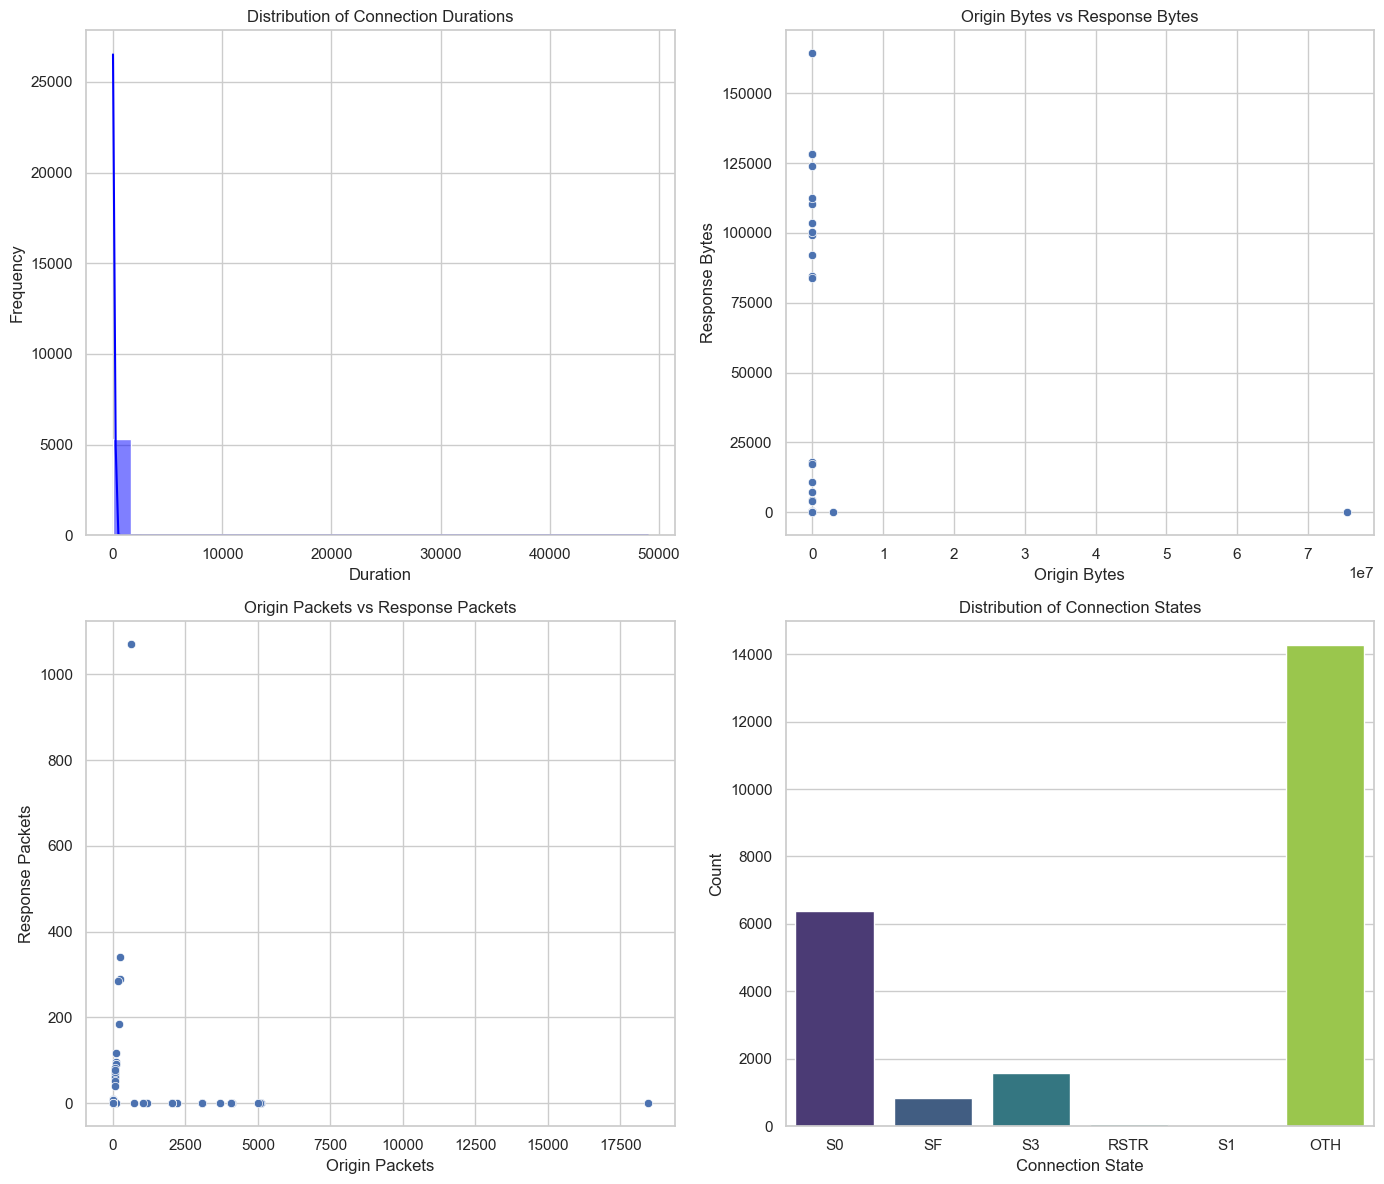

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to contain the subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plotting the distribution of connection duration
sns.histplot(df['duration'], bins=30, ax=axs[0, 0], color='blue', kde=True)
axs[0, 0].set_title('Distribution of Connection Durations')
axs[0, 0].set_xlabel('Duration')
axs[0, 0].set_ylabel('Frequency')

# Plotting the orig_bytes and resp_bytes
sns.scatterplot(x='orig_bytes', y='resp_bytes', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Origin Bytes vs Response Bytes')
axs[0, 1].set_xlabel('Origin Bytes')
axs[0, 1].set_ylabel('Response Bytes')

# Plotting the orig_pkts and resp_pkts
sns.scatterplot(x='orig_pkts', y='resp_pkts', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Origin Packets vs Response Packets')
axs[1, 0].set_xlabel('Origin Packets')
axs[1, 0].set_ylabel('Response Packets')

# Count plot for connection states
sns.countplot(x='conn_state', data=df, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Distribution of Connection States')
axs[1, 1].set_xlabel('Connection State')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


# DESCRIPTION ABOUT THE GRAPH 



***Distribution of Connection Durations***
Title: Distribution of Connection Durations
X-axis: Duration (in seconds)
Y-axis: Frequency
Observations:
The histogram indicates that the vast majority of network connections have very short durations, predominantly clustered at the lower end of the duration spectrum.
A significant peak is observed at the shortest duration range, with a frequency exceeding 25,000 connections.
The distribution has a long tail, with a few connections lasting up to 50,000 seconds, suggesting rare occurrences of prolonged connections which could be indicative of abnormal or suspicious activities.
Origin Bytes vs Response Bytes



***Title: Origin Bytes vs Response Bytes***
X-axis: Origin Bytes
Y-axis: Response Bytes
Observations:
The scatter plot shows that most connections involve a low number of origin and response bytes, with the majority of data points clustered near the origin.
There are several outliers, with some connections having a significantly higher number of origin bytes, reaching up to 70 million bytes.
The relationship between origin and response bytes is not linear, indicating that high origin byte values do not necessarily correspond to high response byte values.
Origin Packets vs Response Packets



***Title: Origin Packets vs Response Packets***
X-axis: Origin Packets
Y-axis: Response Packets
Observations:
The scatter plot indicates that most connections involve a low number of packets for both origin and response, clustering near the origin.
There are outliers with a higher number of origin packets, up to 17,500 packets, and response packets, up to 1,000 packets.
This distribution suggests that while most connections are small in packet size, a few connections with significantly larger packet sizes could be indicative of specific behaviors, possibly related to data exfiltration or large data transfers.
Distribution of Connection States



***Title: Distribution of Connection States***
X-axis: Connection State (S0, SF, S3, RSTR, S1, OTH)
Y-axis: Count
Observations:
The bar chart shows the frequency of various connection states, with 'OTH' (other) being the most common state, having a count of around 14,000.
The 'S0' state is the next most frequent, with a count of approximately 6,000, followed by 'S3', 'SF', and 'RSTR'.
The 'S1' state has the lowest count among the specified states.
The prevalence of the 'OTH' state suggests a wide variety of connection states, which may include uncommon or unexpected behaviors that could be relevant for detecting anomalies.

In [14]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

In [15]:

# Identify columns with object data type
object_cols = X.select_dtypes(include=['object']).columns

# Convert all object columns to categorical using LabelEncoder
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Ensure all data is string before encoding
    label_encoders[col] = le

# Convert the label column as well
le = LabelEncoder()
y = le.fit_transform(y.astype(str))

# Print data types after conversion
print("\nData types after conversion:")
print(X.dtypes)

# Print first few rows to verify the conversion
print("\nFirst few rows of the dataset after conversion:")
print(X.head())


Data types after conversion:
Unnamed: 0         int64
id.orig_h          int32
id.orig_p          int64
id.resp_h          int32
id.resp_p          int64
proto              int32
service            int32
duration         float64
orig_bytes       float64
resp_bytes       float64
conn_state         int32
missed_bytes       int64
history            int32
orig_pkts          int64
orig_ip_bytes      int64
resp_pkts          int64
resp_ip_bytes      int64
dtype: object

First few rows of the dataset after conversion:
   Unnamed: 0  id.orig_h  id.orig_p  id.resp_h  id.resp_p  proto  service  \
0           0          1      41040         10         80      0        4   
1           1          1      41040         10         80      0        4   
2           2          1      41040         10         80      0        4   
3           3          1      41040         10         80      0        2   
4           4          1      41042         10         80      0        4   

   duration  orig_b

In [16]:
# Columns with null values
columns_with_nulls = ['service', 'duration', 'orig_bytes', 'resp_bytes']

In [17]:
# Print data before imputation for verification
print("\nData before imputation:")
print(X[columns_with_nulls].head(10))


Data before imputation:
   service  duration  orig_bytes  resp_bytes
0        4  3.139211         0.0         0.0
1        4       NaN         NaN         NaN
2        4       NaN         NaN         NaN
3        2  1.477656       149.0    128252.0
4        4  3.147116         0.0         0.0
5        2  1.305004       151.0    128348.0
6        2  1.004605       148.0     91961.0
7        2  4.129647       148.0     99303.0
8        4  3.114215         0.0         0.0
9        4       NaN         NaN         NaN


In [18]:
# Manually fill missing values in 'service' column with the most frequent value
most_frequent_service = X['service'].mode()[0]
X['service'].fillna(most_frequent_service, inplace=True)



C:\Users\0931\AppData\Local\Temp\ipykernel_16188\1392215850.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['service'].fillna(most_frequent_service, inplace=True)


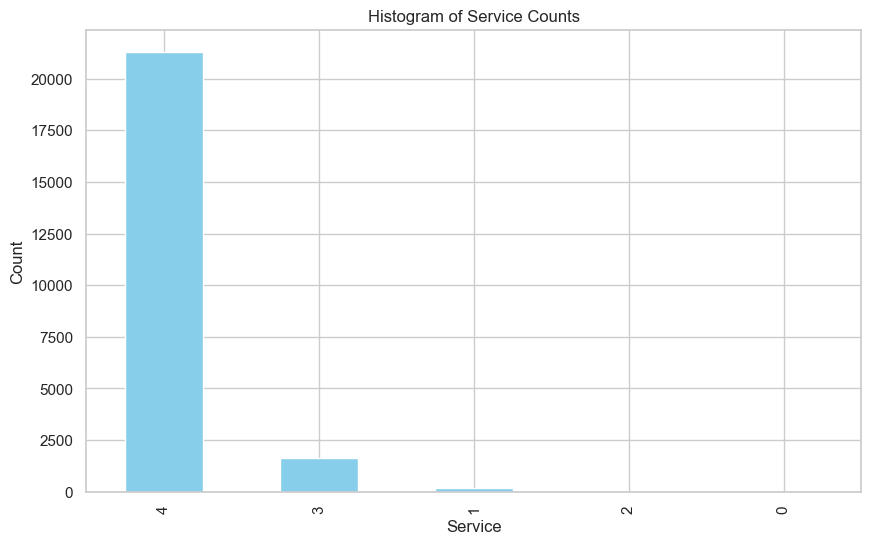

In [19]:
# Histogram
plt.figure(figsize=(10, 6))
X['service'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Service Counts')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

***Title: "Histogram of Service Counts"***
X-axis: Labeled as "Service", representing different service categories. The categories include numerical values 0, 1, 2, 3, and 4.
Y-axis: Labeled as "Count", representing the number of occurrences for each service category.
Bars:
The bar at "4" has the highest count, exceeding 20,000.
The bar at "3" has a count slightly above 2,500.
The bar at "1" has a very small count, close to 0.
The bars at "0" and "2" are not visible, indicating counts of zero or nearly zero.
Color: The bars are colored in light blue.

In [20]:
# Fill missing values in 'duration', 'orig_bytes', and 'resp_bytes' columns (numerical) with the mean
num_imputer = SimpleImputer(strategy='mean')
X[['duration', 'orig_bytes', 'resp_bytes']] = num_imputer.fit_transform(X[['duration', 'orig_bytes', 'resp_bytes']])

C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


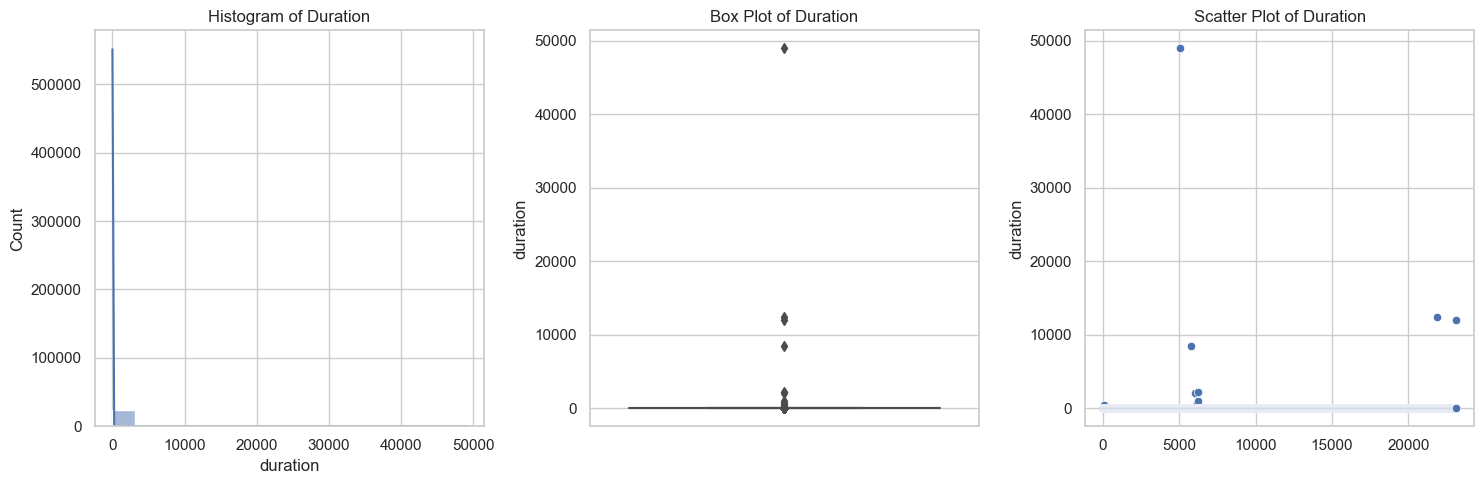

C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


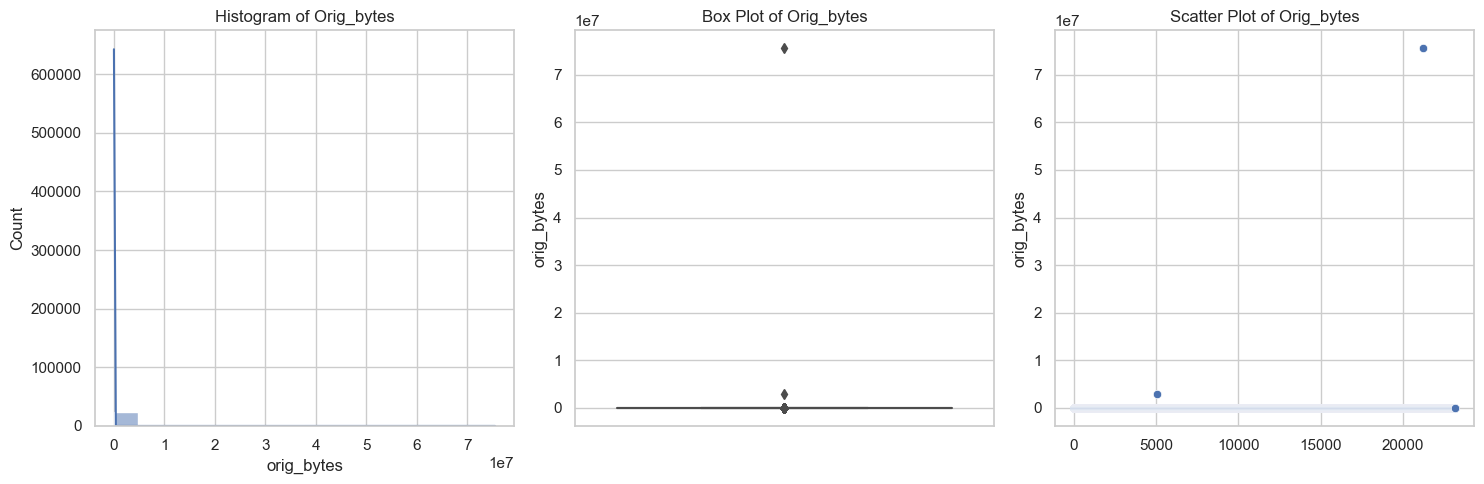

C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


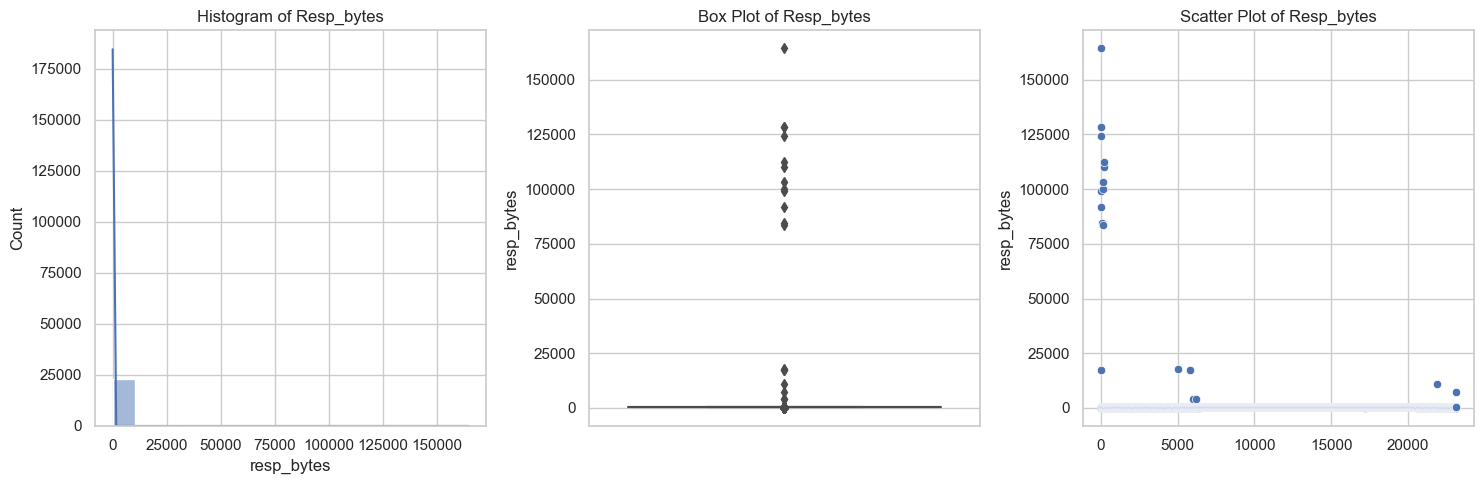

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Assuming 'X' is your DataFrame
# Example DataFrame creation for demonstration (remove this part and use your actual data)
# X = pd.read_csv('your_dataset.csv')

# Impute missing values with the mean
num_imputer = SimpleImputer(strategy='mean')
X[['duration', 'orig_bytes', 'resp_bytes']] = num_imputer.fit_transform(X[['duration', 'orig_bytes', 'resp_bytes']])

# Function to plot graphs
def plot_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))

        # Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column.capitalize()}')

        # Box plot
        plt.subplot(1, 3, 2)
        sns.boxplot(y=df[column])
        plt.title(f'Box Plot of {column.capitalize()}')

        # Scatter plot
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df.index, y=df[column])
        plt.title(f'Scatter Plot of {column.capitalize()}')

        plt.tight_layout()
        plt.show()

# List of columns to plot
columns_to_plot = ['duration', 'orig_bytes', 'resp_bytes']
plot_graphs(X, columns_to_plot)


***1. Duration Column***
Histogram of Duration:
Description: This histogram shows the distribution of the 'duration' values.
Observation: Most of the 'duration' values are clustered very close to 0, with very few values extending up to around 50,000.
Box Plot of Duration:
Description: This box plot visualizes the distribution of 'duration' values, highlighting the median, quartiles, and outliers.
Observation: The box plot indicates a large number of outliers, with most values concentrated near the lower end of the scale. There are significant outliers with values up to approximately 50,000.
Scatter Plot of Duration:
Description: This scatter plot shows individual 'duration' values against their indices.
Observation: The majority of the data points are concentrated near the bottom of the plot, indicating small values for most of the 'duration' entries, with a few points significantly higher, showing the outliers.


***2. Orig_bytes Column***
Histogram of Orig_bytes:
Description: This histogram displays the distribution of the 'orig_bytes' values.
Observation: Most of the 'orig_bytes' values are clustered close to 0, with a very long tail extending towards higher values, up to approximately 7e7 (70 million).
Box Plot of Orig_bytes:
Description: This box plot illustrates the distribution of 'orig_bytes' values, showing the median, quartiles, and outliers.
Observation: There are numerous outliers with very high values, with most values concentrated at the lower end. The plot shows significant outliers, reaching up to around 7e7.
Scatter Plot of Orig_bytes:
Description: This scatter plot shows the 'orig_bytes' values against their indices.
Observation: Similar to the duration column, most points are concentrated near the lower end, with a few high outliers.


***3. Resp_bytes Column***
Histogram of Resp_bytes:
Description: This histogram shows the distribution of 'resp_bytes' values.
Observation: The 'resp_bytes' values are mostly concentrated near 0, with a significant tail extending towards higher values, up to approximately 150,000.
Box Plot of Resp_bytes:
Description: This box plot visualizes the 'resp_bytes' distribution, highlighting the median, quartiles, and outliers.
Observation: There are many outliers, with values reaching up to around 150,000, while most data points are concentrated at the lower end.
Scatter Plot of Resp_bytes:
Description: This scatter plot displays 'resp_bytes' values against their indices.
Observation: The majority of the points are close to zero, with several significant outliers extending towards higher values.

In [22]:
# Print data after imputation for verification
print("\nData after imputation:")
print(X[columns_with_nulls].head(10))



Data after imputation:
   service   duration    orig_bytes     resp_bytes
0        4   3.139211      0.000000       0.000000
1        4  22.806503  14788.684646     350.429431
2        4  22.806503  14788.684646     350.429431
3        2   1.477656    149.000000  128252.000000
4        4   3.147116      0.000000       0.000000
5        2   1.305004    151.000000  128348.000000
6        2   1.004605    148.000000   91961.000000
7        2   4.129647    148.000000   99303.000000
8        4   3.114215      0.000000       0.000000
9        4  22.806503  14788.684646     350.429431


In [23]:
# Combine features and target back into one DataFrame
data_imputed = pd.concat([X, pd.Series(y, name='label')], axis=1)


In [24]:
# Save the cleaned dataset if needed
data_imputed.to_csv('cleaned_dataset.csv', index=False)

In [25]:
# Print the count of null values in each column to ensure there are no nulls left
print("\nNull values after imputation:")
print(data_imputed.isnull().sum())


Null values after imputation:
Unnamed: 0       0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64


In [26]:
df1 = pd.read_csv('cleaned_dataset.csv')

In [27]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
df1.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1,41040,10,80,0,4,3.139211,0.000000,0.000000,2,0,6,3,180,0,0,0
1,1,41040,10,80,0,4,22.806503,14788.684646,350.429431,2,0,6,1,60,0,0,0
2,1,41040,10,80,0,4,22.806503,14788.684646,350.429431,2,0,6,1,60,0,0,0
3,1,41040,10,80,0,2,1.477656,149.000000,128252.000000,5,2896,14,94,5525,96,139044,0
4,1,41042,10,80,0,4,3.147116,0.000000,0.000000,2,0,6,3,180,0,0,0


In [29]:
df1.tail()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
23140,1,57110,10,6667,0,3,32.840994,62.000000,269.000000,4,0,18,7,434,6,589,1
23141,1,57092,10,6667,0,3,36.290833,62.000000,260.000000,4,0,18,10,606,7,632,1
23142,1,123,7,123,1,4,22.806503,14788.684646,350.429431,2,0,3,1,76,0,0,0
23143,1,123,42,123,1,4,22.806503,14788.684646,350.429431,2,0,3,1,76,0,0,0
23144,1,123,44,123,1,4,22.806503,14788.684646,350.429431,2,0,3,1,76,0,0,0


In [30]:
df1.columns


Index(['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service',
       'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'missed_bytes',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'label'],
      dtype='object')

In [31]:
df1.isna().sum()

id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

In [32]:
df1.dtypes

id.orig_h          int64
id.orig_p          int64
id.resp_h          int64
id.resp_p          int64
proto              int64
service            int64
duration         float64
orig_bytes       float64
resp_bytes       float64
conn_state         int64
missed_bytes       int64
history            int64
orig_pkts          int64
orig_ip_bytes      int64
resp_pkts          int64
resp_ip_bytes      int64
label              int64
dtype: object

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
15853,15853,1,65279,3,80,0,4,22.806503,14788.684646,350.429431,0,0,0,0,0,0,0
10035,10035,1,65279,3,80,0,4,22.806503,14788.684646,350.429431,0,0,0,0,0,0,0
286,286,1,49278,10,6667,0,4,3.102733,0.000000,0.000000,2,0,6,3,180,0,0
17448,17448,1,65279,3,80,0,4,22.806503,14788.684646,350.429431,0,0,0,0,0,0,0
8668,8668,1,65279,3,80,0,4,22.806503,14788.684646,350.429431,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,11964,1,65279,3,80,0,4,22.806503,14788.684646,350.429431,0,0,0,0,0,0,0
21575,21575,1,55432,10,6667,0,3,33.130180,62.000000,269.000000,4,0,18,7,434,6,589
5390,5390,1,53640,10,6667,0,4,22.806503,14788.684646,350.429431,2,0,6,1,60,0,0
860,860,1,49934,10,6667,0,4,3.084995,0.000000,0.000000,2,0,6,3,180,0,0


In [35]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
X_test

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
516,516,1,49510,10,6667,0,4,3.104740,0.000000,0.000000,2,0,6,3,180,0,0
7826,7826,1,65279,3,80,0,4,22.806503,14788.684646,350.429431,0,0,0,0,0,0,0
6423,6423,1,65279,3,80,0,4,22.806503,14788.684646,350.429431,0,0,0,0,0,0,0
21758,21758,1,55572,10,6667,0,3,33.769285,62.000000,269.000000,4,0,18,8,494,6,589
3073,3073,1,52022,10,6667,0,3,1.084633,75.000000,243.000000,4,0,18,8,499,6,563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5732,5732,1,54008,10,6667,0,4,3.089748,0.000000,0.000000,2,0,6,3,180,0,0
10540,10540,1,65279,3,80,0,4,22.806503,14788.684646,350.429431,0,0,0,0,0,0,0
8187,8187,1,65279,3,80,0,4,22.806503,14788.684646,350.429431,0,0,0,0,0,0,0
2703,2703,1,51670,10,6667,0,4,22.806503,14788.684646,350.429431,2,0,6,1,60,0,0


In [37]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
# Print the shapes of the training and testing sets
print("\nTraining and testing sets shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Training and testing sets shapes:
X_train: (18516, 17)
X_test: (4629, 17)
y_train: (18516,)
y_test: (4629,)


In [39]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Setup K-Fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation for accuracy
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"Logistic Regression CV Mean Accuracy: {cv_results.mean()}")

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"Logistic Regression Test Accuracy: {model.score(X_test, y_test)}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC: {roc_auc}")


C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Logistic Regression CV Mean Accuracy: 0.9972996617320857
Logistic Regression Test Accuracy: 0.9950313242600993
Precision: 0.9969368520263902
Recall: 0.9976420655505777
F1-Score: 0.9972893341190334
AUC: 0.9998286243518719


C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.metrics import confusion_matrix
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 375   13]
 [  10 4231]]


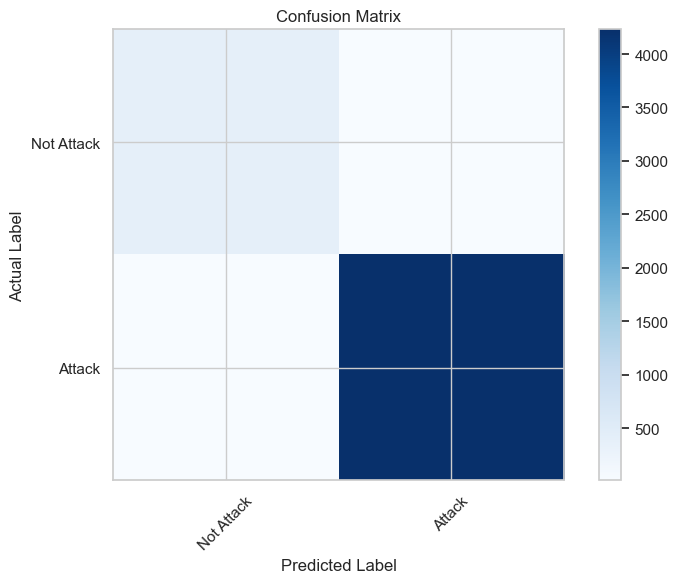

In [41]:
# Plot Confusion Matrix 
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Attack', 'Attack'], rotation=45)
plt.yticks(tick_marks, ['Not Attack', 'Attack'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

True Positives (TP): 4231 - These are the instances where the model correctly predicted an "Attack" (bottom-right cell).


True Negatives (TN): 375 - These are the instances where the model correctly predicted "Not Attack" (top-left cell).


False Positives (FP): 13 - These are the instances where the model incorrectly predicted "Attack" when it was actually "Not Attack" (top-right cell).


False Negatives (FN): 10 - These are the instances where the model incorrectly predicted "Not Attack" when it was actually an "Attack" (bottom-left cell).

In [42]:
from sklearn.metrics import classification_report
# Generate Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       388
           1       1.00      1.00      1.00      4241

    accuracy                           1.00      4629
   macro avg       0.99      0.98      0.98      4629
weighted avg       1.00      1.00      1.00      4629



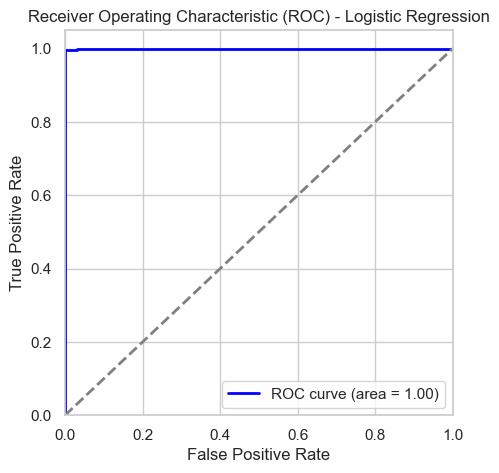

In [43]:
# Plotting the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Define the instance to be predicted
abc = [[0,1, 41040, 10, 80, 0, 4, 3.139211, 0.0, 0.0, 2, 0, 6, 3, 180, 0, 0]]

# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression model
model = LogisticRegression(max_iter=1000)

# Train the model using X_train and y_train
model.fit(X_train, y_train)

# Predict the class of the new instance
result = model.predict(abc)

# Check the prediction and print the corresponding label
if result == 0:
    print('Benign')
else:
    print('Malicious')


Benign


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Define the instance to be predicted
abc = [[59,1,49008,10,6667,0,4,22.806502605149404,14788.684645743282,350.42943055816573,2,0,6,1,60,0,0]]

# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression model
model = LogisticRegression(max_iter=1000)

# Train the model using X_train and y_train
model.fit(X_train, y_train)

# Predict the class of the new instance
result = model.predict(abc)

# Check the prediction and print the corresponding label
if result == 0:
    print('Benign')
else:
    print('Malicious')

Malicious


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
